# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
import pandas as pd
import numpy as np
import os
import json
import pylab as plt
import io
import statsmodels.api as smf
import seaborn as sns
%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
!wget https://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
!unzip SP.POP.TOTL?downloadformat=csv
!mv API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv $PUIDATA
!rm Meta*

--2018-11-12 18:29:44--  https://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.62.171
Connecting to api.worldbank.org (api.worldbank.org)|52.202.62.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79717 (78K) [application/zip]
Saving to: ‘SP.POP.TOTL?downloadformat=csv.4’

SP.POP.TOTL?downloa 100%[===================>]  77.85K  --.-KB/s    in 0.01s   

2018-11-12 18:29:44 (6.64 MB/s) - ‘SP.POP.TOTL?downloadformat=csv.4’ saved [79717/79717]

Archive:  SP.POP.TOTL?downloadformat=csv
  inflating: Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  


In [3]:
#Download this as well. 
!wget http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
!unzip NY.GDP.MKTP.CD?downloadformat=csv
!mv API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv $PUIDATA
!rm Meta*

URL transformed to HTTPS due to an HSTS policy
--2018-11-12 18:29:44--  https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.62.171
Connecting to api.worldbank.org (api.worldbank.org)|52.202.62.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116071 (113K) [application/zip]
Saving to: ‘NY.GDP.MKTP.CD?downloadformat=csv.3’

NY.GDP.MKTP.CD?down 100%[===================>] 113.35K  --.-KB/s    in 0.02s   

2018-11-12 18:29:45 (4.57 MB/s) - ‘NY.GDP.MKTP.CD?downloadformat=csv.3’ saved [116071/116071]

Archive:  NY.GDP.MKTP.CD?downloadformat=csv
  inflating: Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  


In [4]:
wb_pop = pd.read_csv(os.getenv("PUIDATA") + "/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv", skiprows = [0,1,2,3])
wb_pop = wb_pop.rename(columns = {'2012': 'pop'})
wb_pop.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965     ...       \
0    55438.0    56225.0    56695.0    57032.0    57360.0     ...        
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0     ...        
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0     ...        
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0     ...        
4    14375.0    15370.0    16412.0    17469.0    18549.0     ...        

         2009        2010        2011         pop        2013        2014  \
0    101453.0    101669.0    102053.0    102577.0    103187.0    103795.0   
1  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0  32758020.0   
2  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0  26920466.0   
3   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   2889104.0   
4     84462.0     84449.0     83751.0     82431.0     80788.0     79223.0   

         2015        2016        2017  Unnamed: 62  
0    104341.0    104822.0    105264.0          NaN  
1  33736494.0  34656032.0  35530081.0          NaN  
2  27859305.0  28813463.0  29784193.0          NaN  
3   2880703.0   2876101.0   2873457.0          NaN  
4     78014.0     77281.0     76965.0          NaN  

[5 rows x 63 columns]

In [5]:
wb_gdp = pd.read_csv(os.getenv("PUIDATA") + "/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv", skiprows = [0,1,2,3])
wb_gdp = wb_gdp.rename(columns = {'2012': 'gdp'})
wb_gdp.head()

Country Name Country Code     Indicator Name  Indicator Code          1960  \
0        Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
1  Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD  5.377778e+08   
2       Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
3      Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
4      Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD           NaN   

           1961          1962          1963          1964          1965  \
0           NaN           NaN           NaN           NaN           NaN   
1  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08  1.006667e+09   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

      ...               2009          2010          2011           gdp  \
0     ...       2.498933e+09  2.467704e+09  2.584464e+09           NaN   
1     ...       1.248694e+10  1.593680e+10  1.793024e+10  2.053654e+10   
2     ...       7.549239e+10  8.252614e+10  1.041158e+11  1.139232e+11   
3     ...       1.204421e+10  1.192695e+10  1.289087e+10  1.231978e+10   
4     ...       3.660531e+09  3.355695e+09  3.442063e+09  3.164615e+09   

           2013          2014          2015          2016          2017  \
0           NaN           NaN           NaN           NaN           NaN   
1  2.026425e+10  2.061610e+10  1.921556e+10  1.946902e+10  2.081530e+10   
2  1.249125e+11  1.267302e+11  1.026212e+11  9.533720e+10  1.242094e+11   
3  1.277628e+10  1.322824e+10  1.138693e+10  1.188368e+10  1.303935e+10   
4  3.281585e+09  3.350736e+09  2.811489e+09  2.877312e+09  3.012914e+09   

   Unnamed: 62  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 63 columns]

In [6]:
wb_pop_gdp = wb_pop.merge(wb_gdp, how = "inner", on ="Country Name")
wb_pop_gdp = wb_pop_gdp[['Country Name', 'pop', 'gdp']]
wb_pop_gdp.head()

Country Name         pop           gdp
0        Aruba    102577.0           NaN
1  Afghanistan  30696958.0  2.053654e+10
2       Angola  25096150.0  1.139232e+11
3      Albania   2900401.0  1.231978e+10
4      Andorra     82431.0  3.164615e+09

In [7]:
firearms = pd.read_csv(os.getenv("PUIDATA") + "/World firearms murders and ownership - Sheet 1.csv")
firearms.head()

Country/Territory ISO code               Source  % of homicides by firearm  \
0           Albania       AL                  CTS                       65.9   
1           Algeria       DZ                  CTS                        4.8   
2            Angola       AO                  NaN                        NaN   
3          Anguilla       AI              WHO-MDB                       24.0   
4         Argentina       AR  Ministry of Justice                       52.0   

   Number of homicides by firearm  Homicide by firearm rate per 100,000 pop  \
0                            56.0                                      1.76   
1                            20.0                                      0.06   
2                             NaN                                       NaN   
3                             1.0                                      7.14   
4                          1198.0                                      3.02   

   Rank by rate of ownership  Average firearms per 100 people  \
0                       70.0                              8.6   
1                       78.0                              7.6   
2                       34.0                             17.3   
3                        NaN                              NaN   
4                       62.0                             10.2   

   Average total all civilian firearms  
0                             270000.0  
1                            1900000.0  
2                            2800000.0  
3                                  NaN  
4                            3950000.0

In [8]:
# Read in the data with %20....
gun_violence = pd.read_csv(os.getenv("PUIDATA") + "/data-pvLFI.csv")
gun_violence.head()

Country  Guns per 100 inhabitants  Number of mass shootings (1983-2013)
0  Australia                      15.0                                     4
1    Austria                      30.4                                     1
2    Belgium                      17.2                                     2
3     Canada                      30.8                                     4
4    Denmark                      12.0                                     0

In [9]:
wb_new = wb_pop_gdp.merge(firearms, how = "inner", right_on = "Country/Territory", left_on = "Country Name")
wb_new = wb_new[['Country Name', 'pop', 'gdp', 'Number of homicides by firearm', 
                 'Average firearms per 100 people', 'Average total all civilian firearms']]
wb_new.head()

Country Name         pop           gdp  \
0                Angola  25096150.0  1.139232e+11   
1               Albania   2900401.0  1.231978e+10   
2  United Arab Emirates   8900453.0  3.745906e+11   
3             Argentina  42096739.0  5.459824e+11   
4               Armenia   2881922.0  1.061932e+10   

   Number of homicides by firearm  Average firearms per 100 people  \
0                             NaN                             17.3   
1                            56.0                              8.6   
2                             NaN                             22.1   
3                          1198.0                             10.2   
4                             9.0                             12.5   

   Average total all civilian firearms  
0                            2800000.0  
1                             270000.0  
2                            1000000.0  
3                            3950000.0  
4                             380000.0

In [10]:
gun_violence_df = gun_violence.merge(wb_new, how = "inner", right_on = "Country Name", left_on = "Country")
gun_violence_df = gun_violence_df.drop(['Average firearms per 100 people'], axis = 1)
gun_violence_df.head()

Country  Guns per 100 inhabitants  Number of mass shootings (1983-2013)  \
0  Australia                      15.0                                     4   
1    Austria                      30.4                                     1   
2    Belgium                      17.2                                     2   
3     Canada                      30.8                                     4   
4    Denmark                      12.0                                     0   

  Country Name         pop           gdp  Number of homicides by firearm  \
0    Australia  22742475.0  1.543411e+12                            30.0   
1      Austria   8429991.0  4.094252e+11                            18.0   
2      Belgium  11128246.0  4.978842e+11                            70.0   
3       Canada  34750545.0  1.824289e+12                           173.0   
4      Denmark   5591572.0  3.271489e+11                            15.0   

   Average total all civilian firearms  
0                            3050000.0  
1                            2500000.0  
2                            1800000.0  
3                            9950000.0  
4                             650000.0

In [11]:
#df_ = df_.merge(ms, right_on="Country", left_on="Country Name")
#df_.head()

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


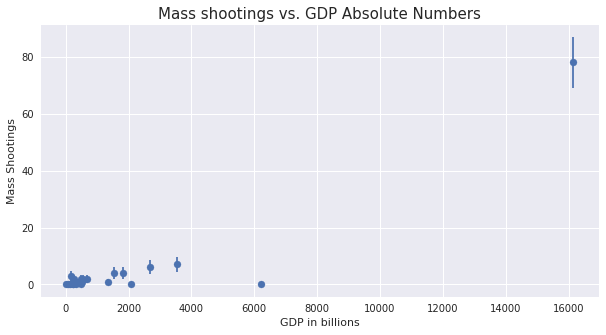

In [27]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(gun_violence_df.gdp / 1e9, gun_violence_df['Number of mass shootings (1983-2013)'])
ax.errorbar(gun_violence_df.gdp / 1e9, gun_violence_df['Number of mass shootings (1983-2013)'], 
           yerr = np.sqrt(gun_violence_df['Number of mass shootings (1983-2013)'] * 1.0), fmt = '.')

plt.title("Mass shootings vs. GDP Absolute Numbers", fontsize = 15)
plt.xlabel("GDP in billions")
plt.ylabel("Mass Shootings")
plt.show()

#### Figure 1

From the figure above, there is a cluster of nations with relatively low GDPs and mass shootings. What sticks out in particular here is the point that is nearing 80 mass shootings considering no other nation nears 20. Additionally, there seems to be an ever so slight upwards trend between GDP and mass shootings.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


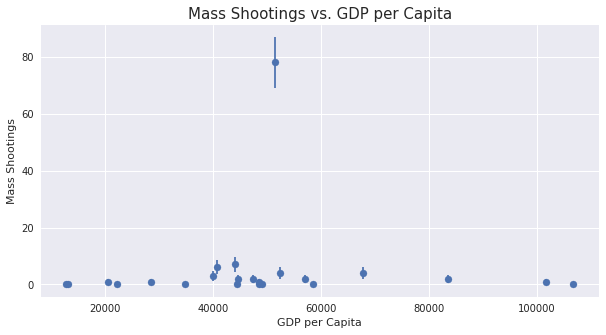

In [29]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(gun_violence_df['gdp'] / gun_violence_df['pop'], 
                     gun_violence_df['Number of mass shootings (1983-2013)'])
ax.errorbar(gun_violence_df['gdp'] / gun_violence_df['pop'], gun_violence_df['Number of mass shootings (1983-2013)'],
            yerr = np.sqrt(gun_violence_df['Number of mass shootings (1983-2013)'] * 1.0), fmt = '.')
plt.title("Mass Shootings vs. GDP per Capita", fontsize = 15)
plt.xlabel("GDP per Capita")
plt.ylabel("Mass Shootings")
plt.show()

#### Figure 2

This plot is showing GDP per Capita versus Mass shootings. In this case, there again is the obvious outlier with mass shootings nearing 80. While in the above plot, there was a very slight association between GDP and mass shootings, there appears to be no such trend with GDP per Capita. 

In [14]:
#fig = pl.figure(figsize=(10,5)) 
#ax = fig.add_subplot(111)

#scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
#ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
#            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
#ax.set_xlabel("GDP (in billions)")
#ax.set_ylabel("Number of mass shooting per person")
#ax.set_ylim()
#pl.show()
#print ("Number of mass shooting vs GDP, " + 
#       "errors represent Poisson statistics.\n" + 
#       "The datapoint to the top right of the plot is the USA, " + 
#       "which has noth the highest GDP and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


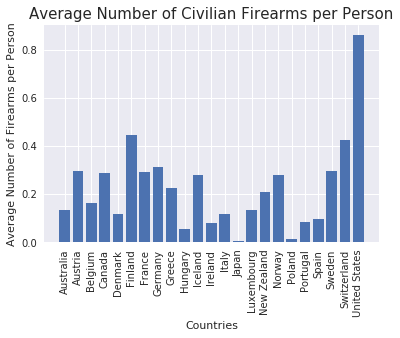

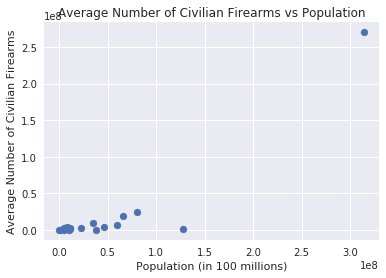

In [45]:
fig = plt.subplots(1,1)

bar = plt.bar(gun_violence_df['Country Name'], 
             gun_violence_df['Average total all civilian firearms'] / gun_violence_df['pop'])
plt.xticks(gun_violence_df['Country Name'], gun_violence_df['Country Name'], rotation='vertical')
plt.title("Average Number of Civilian Firearms per Person", fontsize = 15)
plt.ylabel("Average Number of Firearms per Person")
plt.xlabel("Countries")
plt.show()

scatter = plt.scatter(gun_violence_df['pop'], gun_violence_df['Average total all civilian firearms'])
plt.title("Average Number of Civilian Firearms vs Population")
plt.xlabel("Population (in 100 millions)")
plt.ylabel("Average Number of Civilian Firearms")
plt.show()

#### Figures 3 and 4

The above plot shows the average number of firearms per person for each country in our dataset. The United States stands out as an outlier, as the only country exceeding 0.5 Firearms per person. Additionally, Japan and Poland stand out as countries with a very low number of firearms per person. 

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


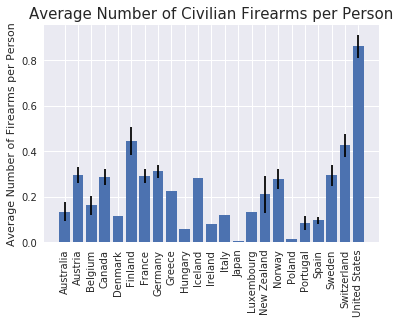

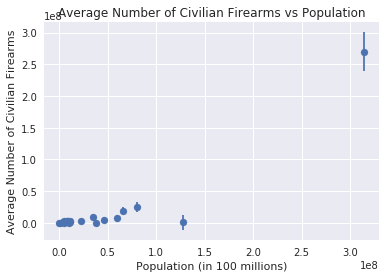

In [74]:
fig = plt.subplots(1,1)

bar = plt.bar(gun_violence_df['Country Name'], 
             gun_violence_df['Average total all civilian firearms'] / gun_violence_df['pop'],
            yerr = np.sqrt(gun_violence_df['Number of mass shootings (1983-2013)'] / gun_violence_df['pop'] * 1e4))
plt.xticks(gun_violence_df['Country Name'], gun_violence_df['Country Name'], rotation='vertical')
plt.title("Average Number of Civilian Firearms per Person", fontsize = 15)
plt.ylabel("Average Number of Firearms per Person")
plt.show()

scatter = plt.scatter(gun_violence_df['pop'], gun_violence_df['Average total all civilian firearms'])
plt.errorbar(gun_violence_df['pop'], gun_violence_df['Average total all civilian firearms'],
            yerr = 10 * (gun_violence_df['Average total all civilian firearms'] / gun_violence_df['Guns per 100 inhabitants']),
            fmt = '.')
plt.title("Average Number of Civilian Firearms vs Population")
plt.xlabel("Population (in 100 millions)")
plt.ylabel("Average Number of Civilian Firearms")
plt.show()

# CHANGE THE PLOT. WHAT DO I USE AS ERROR

In [17]:
#df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0,0.5,'Frequency')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


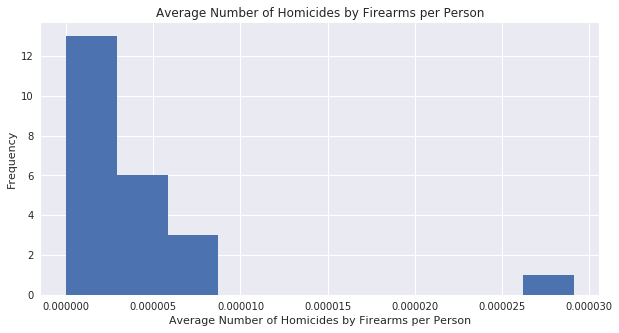

In [18]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

hist = ax.hist(gun_violence_df['Number of homicides by firearm'] / gun_violence_df['pop'], bins = 10)
plt.title("Average Number of Homicides by Firearms per Person")
plt.xlabel("Average Number of Homicides by Firearms per Person")
plt.ylabel("Frequency")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


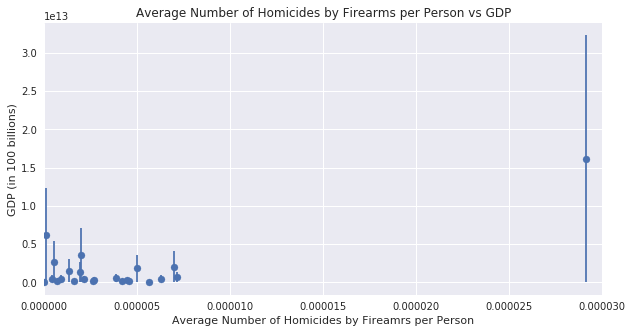

In [58]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(gun_violence_df['Number of homicides by firearm'] / gun_violence_df['pop'],
                    gun_violence_df['gdp'])
ax.errorbar(gun_violence_df['Number of homicides by firearm'] / gun_violence_df['pop'],
           gun_violence_df['gdp'],
            yerr = gun_violence_df['gdp'],
           fmt = '.')
plt.xlim(0, 0.00003)
plt.title("Average Number of Homicides by Firearms per Person vs GDP")
plt.xlabel("Average Number of Homicides by Fireamrs per Person")
plt.ylabel("GDP (in 100 billions)")
plt.show()

# ERROR NOT SHOWING

In [20]:
#fig, ax = plt.subplots()
#ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
#ax.set_xlabel('homicides by firearm per 1000 people');

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


Text(0.5,0,'Number of Homicides by Firearms')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


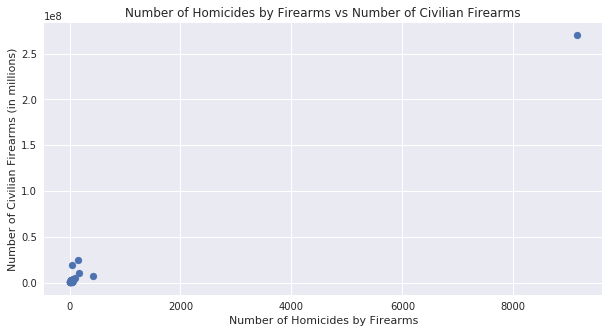

In [21]:
fig = plt.figure(figsize = (10,5))
ax2 = fig.add_subplot(111)

scatter = ax2.scatter(gun_violence_df['Number of homicides by firearm'], gun_violence_df['Average total all civilian firearms'])

plt.title("Number of Homicides by Firearms vs Number of Civilian Firearms")
plt.ylabel("Number of Civilian Firearms (in millions)")
plt.xlabel("Number of Homicides by Firearms")

Text(0.5,0,'Number of Homicides by Firearms')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


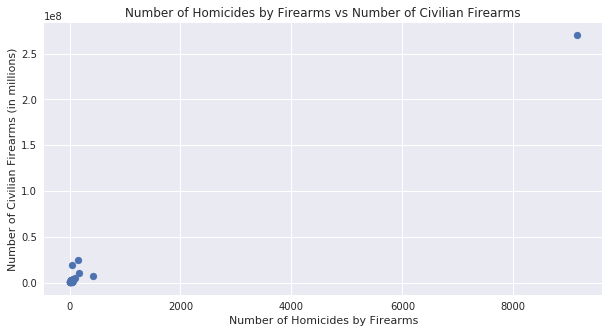

In [22]:
fig = plt.figure(figsize = (10,5))
ax2 = fig.add_subplot(111)

scatter = ax2.scatter(gun_violence_df['Number of homicides by firearm'], gun_violence_df['Average total all civilian firearms'])
ax2.errorbar(gun_violence_df['Number of homicides by firearm'], gun_violence_df['Average total all civilian firearms'],
           yerr = np.sqrt(gun_violence_df['Number of mass shootings (1983-2013)'] / gun_violence_df['pop'] * 1e8),
           fmt = '.')
plt.title("Number of Homicides by Firearms vs Number of Civilian Firearms")
plt.ylabel("Number of Civilian Firearms (in millions)")
plt.xlabel("Number of Homicides by Firearms")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


Text(0,0.5,'Number of Civilian Firearms (in millions)')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


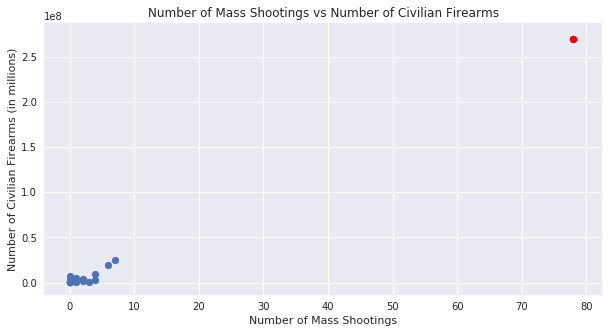

In [83]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

usa = gun_violence_df.loc[gun_violence_df['Country Name'] == 'United States']

scatter = ax.scatter(gun_violence_df['Number of mass shootings (1983-2013)'], gun_violence_df['Average total all civilian firearms'])
usa_plot = ax.scatter(usa['Number of mass shootings (1983-2013)'], usa['Average total all civilian firearms'], c = 'r')

plt.title("Number of Mass Shootings vs Number of Civilian Firearms")
plt.xlabel("Number of Mass Shootings")
plt.ylabel("Number of Civilian Firearms (in millions)")

Text(0,0.5,'Number of Civilian Firearms (in millions)')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


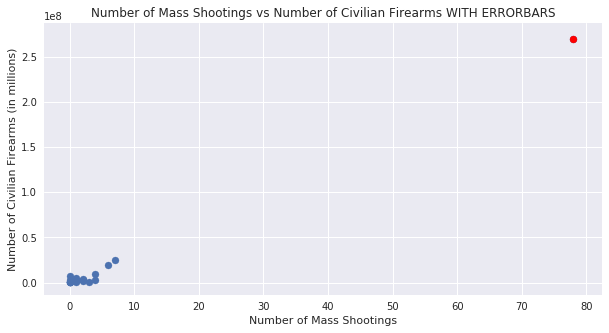

In [82]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

scatter = ax.scatter(gun_violence_df['Number of mass shootings (1983-2013)'], gun_violence_df['Average total all civilian firearms'])
usa_plot = ax.scatter(usa['Number of mass shootings (1983-2013)'], usa['Average total all civilian firearms'], c = 'r')


plt.title("Number of Mass Shootings vs Number of Civilian Firearms WITH ERRORBARS")
plt.xlabel("Number of Mass Shootings")
plt.ylabel("Number of Civilian Firearms (in millions)")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [25]:
def weights(x):
    std_x = np.sqrt(np.std(x))
    x = 1 / (x * std_x)
    return x

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


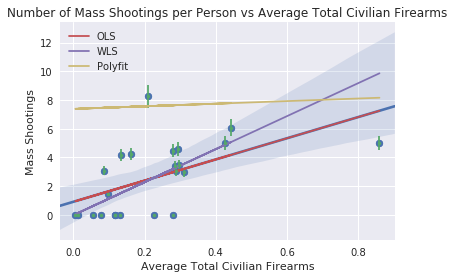

In [26]:
y = np.sqrt(gun_violence_df['Number of mass shootings (1983-2013)'] / gun_violence_df['pop']) * 1e4
x = gun_violence_df['Average total all civilian firearms'] / gun_violence_df['pop']

smfit = smf.OLS(y, smf.add_constant(x)).fit()
smfit_weight = smf.WLS(y, smf.add_constant(x), 
                       weights = weights(x)).fit()
p = smfit.params
p_w = smfit_weight.params
z = np.polyfit(x, y, 1)
sb = sns.regplot(x, y)
plt.scatter(x, y)
plt.errorbar(x, y, 
             yerr = np.sqrt(gun_violence_df['Number of mass shootings (1983-2013)'] / gun_violence_df['pop']) * 1e3,
            fmt = '.')
plt.plot(x, p[0] + p[1] * x, label = "OLS")
plt.plot(x, p_w[0] + p_w[1] * x, label = "WLS")
plt.plot(x, z[0] + z[1] * x, label = "Polyfit")
plt.title("Number of Mass Shootings per Person vs Average Total Civilian Firearms")
plt.ylabel("Mass Shootings")
plt.xlabel("Average Total Civilian Firearms")
plt.legend()

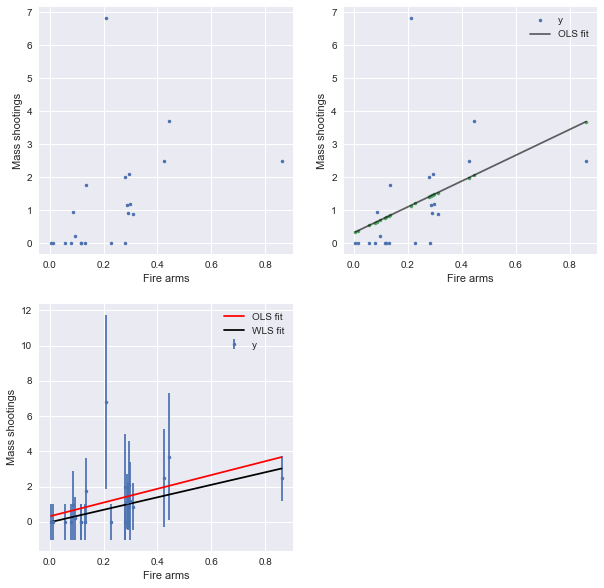

the plots should look something like this (not necessarily exactly, due to the choices of the error


## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



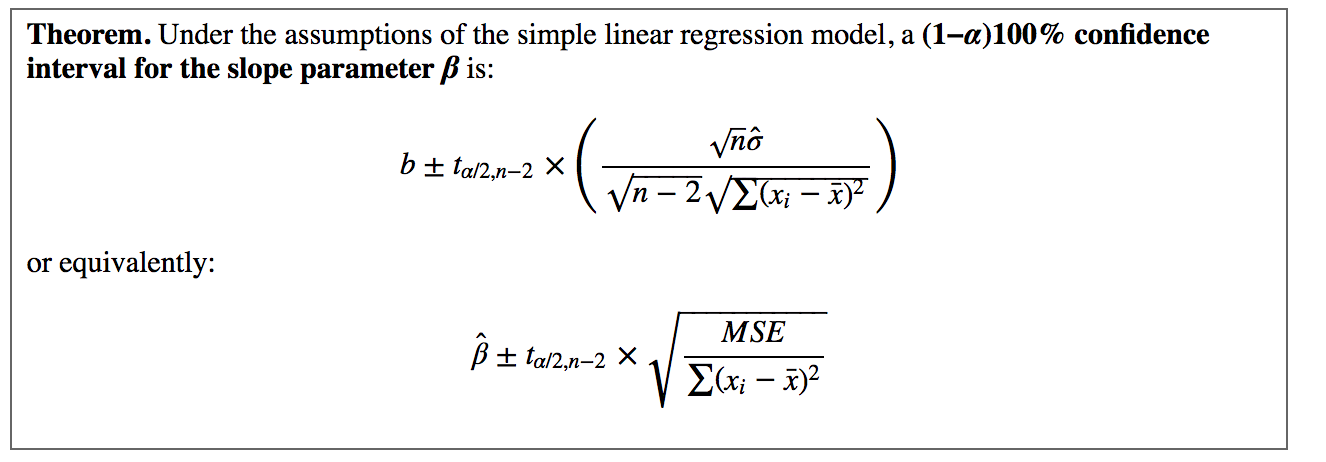

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

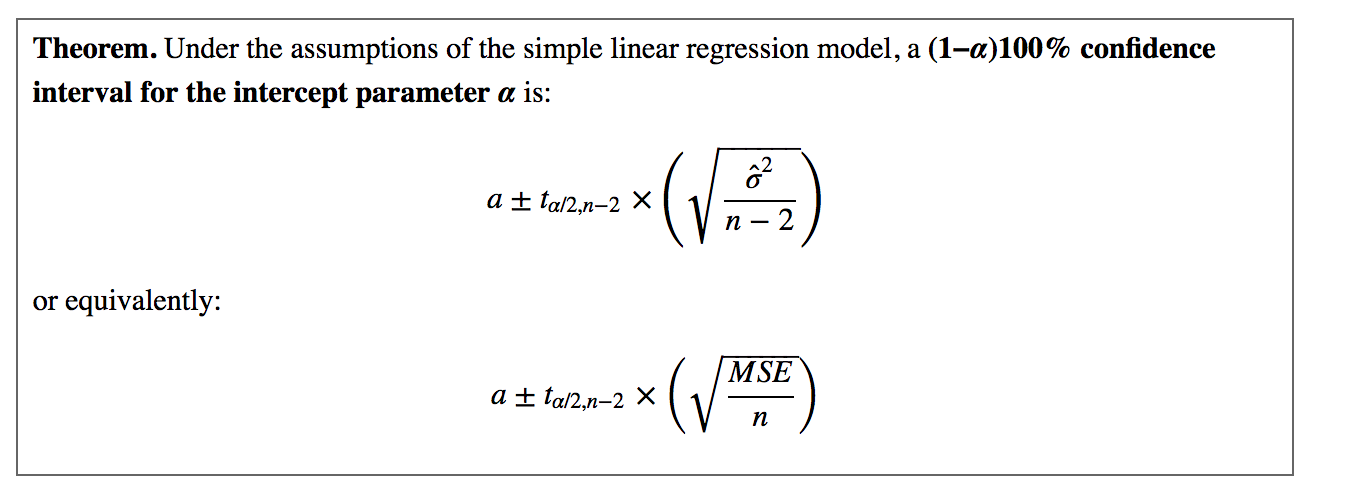

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

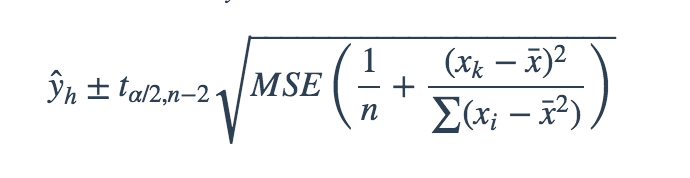

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

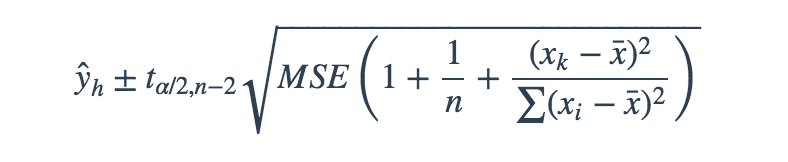

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

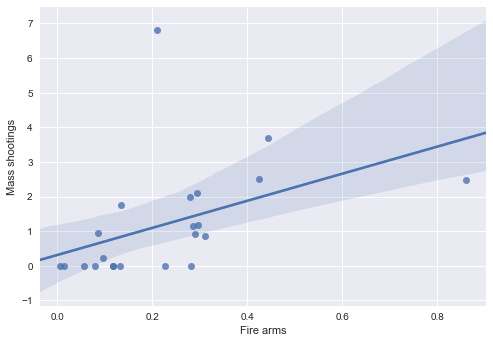

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

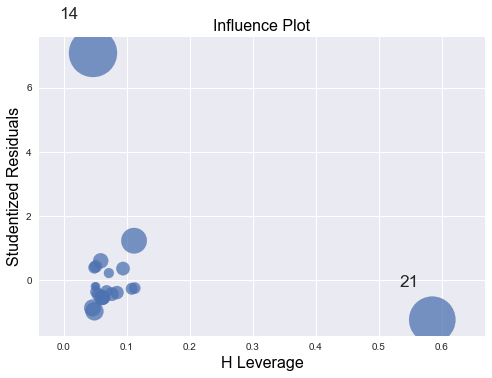

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings